# Top 30 cryptocurrencies by market cap from coinmarketcap.com

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.optimize import curve_fit
import time

%matplotlib inline

In [2]:
def get_historical_data(currency, url):
    print(f'Getting {currency}')
    assert type(currency) == str, 'currency is not a str'
    assert type(url) == str, 'url is not a str'
    
    soup = BeautifulSoup(requests.get(url)._content, 'html.parser')

    columns = [x.string for x in soup.find_all('th')]
    assert columns == ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], 'columns header mismatch'
    columns.insert(0, 'Name')

    data = [x.string for x in soup.find_all('td')]
    
    df = pd.DataFrame(
        list(zip(
            [currency for x in range(len(data))],
            pd.to_datetime(data[0::7]),
            data[1::7],
            data[2::7],
            data[3::7],
            data[4::7],
            data[5::7],
            data[6::7])),
        columns=columns,
        dtype=np.float64
    )

    df['Date'] = pd.to_datetime(df['Date'])
    
    df['Volume'] = df['Volume'].str.replace(',', '')
    df['Volume'] = df['Volume'].astype(float)
    
    df['Market Cap'] = df['Market Cap'].str.replace('-', '0')
    df['Market Cap'] = df['Market Cap'].str.replace(',', '')
    df['Market Cap'] = df['Market Cap'].astype(float)

    return df

In [3]:
start = '20170101'
today = time.strftime("%Y%m%d")

coinListGet = requests.get(f'https://coinmarketcap.com/all/views/all/')
coinListSoup = BeautifulSoup(coinListGet._content, 'html.parser')

currencyAddresses = [x.get('href') for x in coinListSoup.findAll('a', {'class' : 'currency-name-container'})]
currencies = [x.get_text() for x in coinListSoup.findAll('a', {'class' : 'currency-name-container'})]
currencyURLS = [f'https://coinmarketcap.com{address}historical-data/?start={start}&end={today}' for address in currencyAddresses]

topX = 30
lilBlackBook = {currency: url for currency, url in zip(currencies[:topX], currencyURLS[:topX])}

In [4]:
df = pd.DataFrame()
for currency, url in lilBlackBook.items():
    df_new = get_historical_data(currency, url)
    df = pd.concat([df, df_new])
df = df.set_index('Name')

Getting Bitcoin
Getting Ripple
Getting Ethereum
Getting Bitcoin Cash
Getting Litecoin
Getting Cardano
Getting IOTA
Getting NEM
Getting Dash
Getting Monero
Getting EOS
Getting Stellar
Getting NEO
Getting Bitcoin Gold
Getting Qtum
Getting Ethereum Classic
Getting BitConnect
Getting Lisk
Getting Verge
Getting TRON
Getting ICON
Getting Ardor
Getting Zcash
Getting RaiBlocks
Getting OmiseGO
Getting Stratis
Getting Populous
Getting BitShares
Getting Tether
Getting Waves


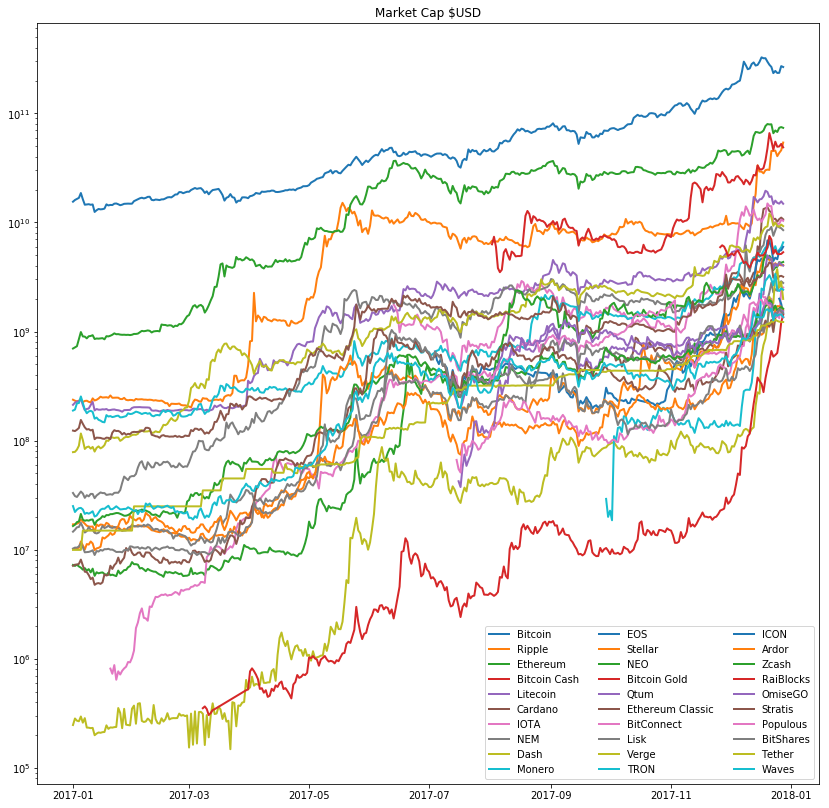

In [5]:
fig, ax = plt.subplots(figsize=(14, 14))
for currency, url in lilBlackBook.items():
    ax.semilogy(df.loc[currency, 'Date'], df.loc[currency, 'Market Cap'], label=currency, lw=2)
ax.legend(ncol=3, loc=0)
ax.set_title('Market Cap $USD');